### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:

scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


In [5]:
mld_ukesm_1A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1A.nc')
mld_ukesm_1B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1B.nc')
mld_ukesm_2A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2A.nc')
mld_ukesm_2B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2B.nc')
mld_ukesm_3A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3A.nc')
mld_ukesm_3B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3B.nc')

mld_tom_1A = xr.open_dataset(f'./extracted-summary/somxl010_tom_1AA6.nc')
mld_tom_1B = xr.open_dataset(f'./extracted-summary/somxl010_tom_1BA6.nc')
mld_tom_2A = xr.open_dataset(f'./extracted-summary/somxl010_tom_2AA6.nc')
mld_tom_2B = xr.open_dataset(f'./extracted-summary/somxl010_tom_2BA6.nc')
mld_tom_3A = xr.open_dataset(f'./extracted-summary/somxl010_tom_3AA6.nc')
mld_tom_3B = xr.open_dataset(f'./extracted-summary/somxl010_tom_3BA6.nc')

sst_ukesm_1A = xr.open_dataset(f'./extracted-summary/SST_ukesm_1A.nc')
sst_ukesm_1B = xr.open_dataset(f'./extracted-summary/SST_ukesm_1B.nc')
sst_ukesm_2A = xr.open_dataset(f'./extracted-summary/SST_ukesm_2A.nc')
sst_ukesm_2B = xr.open_dataset(f'./extracted-summary/SST_ukesm_2B.nc')
sst_ukesm_3A = xr.open_dataset(f'./extracted-summary/SST_ukesm_3A.nc')
sst_ukesm_3B = xr.open_dataset(f'./extracted-summary/SST_ukesm_3B.nc')

sst_tom_1A = xr.open_dataset(f'./extracted-summary/SST_tom_1AA6.nc')
sst_tom_1B = xr.open_dataset(f'./extracted-summary/SST_tom_1BA6.nc')
sst_tom_2A = xr.open_dataset(f'./extracted-summary/SST_tom_2AA6.nc')
sst_tom_2B = xr.open_dataset(f'./extracted-summary/SST_tom_2BA6.nc')
sst_tom_3A = xr.open_dataset(f'./extracted-summary/SST_tom_3AA6.nc')
sst_tom_3B = xr.open_dataset(f'./extracted-summary/SST_tom_3BA6.nc')

In [6]:
def make_yearlist_tom(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}-TOMA6.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_tom_1A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1A'))
ot_tom_2A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2A'))
ot_tom_3A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3A'))
ot_tom_1B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1B'))
ot_tom_2B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2B'))
ot_tom_3B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3B'))

def make_yearlist(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_ukesm_1A = xr.open_mfdataset(make_yearlist(1950,2099,'1A'))
ot_ukesm_2A = xr.open_mfdataset(make_yearlist(1950,2099,'2A'))
ot_ukesm_3A = xr.open_mfdataset(make_yearlist(1950,2099,'3A'))
ot_ukesm_1B = xr.open_mfdataset(make_yearlist(1950,2099,'1B'))
ot_ukesm_2B = xr.open_mfdataset(make_yearlist(1950,2099,'2B'))
ot_ukesm_3B = xr.open_mfdataset(make_yearlist(1950,2099,'3B'))

In [40]:
ot_ukesm_1A

<xarray.Dataset>
Dimensions:          (time_counter: 600)
Coordinates:
  * time_counter     (time_counter) datetime64[ns] 1950-01-01 ... 2099-10-01
Data variables:
    max_OT           (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    lat_OT           (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    sigma2000_OT     (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    max_OT_yr        (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    lat_OT_yr        (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    sigma2000_OT_yr  (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
Attributes:
    made in:  SOZONE/windAnalyis/oceanFields/OT.ipynb
    desc:     where and when does maximum overturning occur

### calculate value given ts and season

In [23]:
def calc_mv(ds, var, yst, yen, seas = 'FY'):
    
    if seas == 'FY':
        tval = ds[var].sel(time_counter=slice(f'{yst}-01-01', f'{yen}-01-01')).\
        groupby('time_counter.year').mean().mean(dim = 'year').values
        
    else:
        tval = ds[var].sel\
        (time_counter=(ds['time_counter.season'] == seas)).\
        sel(time_counter=slice(f'{yst}-01-01', f'{yen}-01-01')).mean().values
        
    return tval 



2.288700211507445
2.9629992688909064


## do value calculations for sst, mld, ot, 2010-2020 vs 2090-2100

In [46]:
sst_ukesm_1A_sta_FY = (calc_mv(sst_ukesm_1A, 'tos', 2010, 2020, 'FY'))
sst_ukesm_1A_sta_DJF = (calc_mv(sst_ukesm_1A, 'tos', 2010, 2020, 'DJF'))
sst_ukesm_1A_sta_MAM = (calc_mv(sst_ukesm_1A, 'tos', 2010, 2020, 'MAM'))  
sst_ukesm_1A_sta_JJA = (calc_mv(sst_ukesm_1A, 'tos', 2010, 2020, 'JJA'))  
sst_ukesm_1A_sta_SON = (calc_mv(sst_ukesm_1A, 'tos', 2010, 2020, 'SON'))  

sst_ukesm_1B_sta_FY = (calc_mv(sst_ukesm_1B, 'tos', 2010, 2020, 'FY'))
sst_ukesm_1B_sta_DJF = (calc_mv(sst_ukesm_1B, 'tos', 2010, 2020, 'DJF'))
sst_ukesm_1B_sta_MAM = (calc_mv(sst_ukesm_1B, 'tos', 2010, 2020, 'MAM'))  
sst_ukesm_1B_sta_JJA = (calc_mv(sst_ukesm_1B, 'tos', 2010, 2020, 'JJA'))  
sst_ukesm_1B_sta_SON = (calc_mv(sst_ukesm_1B, 'tos', 2010, 2020, 'SON'))  

sst_ukesm_2A_sta_FY = (calc_mv(sst_ukesm_2A, 'tos', 2010, 2020, 'FY'))
sst_ukesm_2A_sta_DJF = (calc_mv(sst_ukesm_2A, 'tos', 2010, 2020, 'DJF'))
sst_ukesm_2A_sta_MAM = (calc_mv(sst_ukesm_2A, 'tos', 2010, 2020, 'MAM'))  
sst_ukesm_2A_sta_JJA = (calc_mv(sst_ukesm_2A, 'tos', 2010, 2020, 'JJA'))  
sst_ukesm_2A_sta_SON = (calc_mv(sst_ukesm_2A, 'tos', 2010, 2020, 'SON'))  

sst_ukesm_2B_sta_FY = (calc_mv(sst_ukesm_2B, 'tos', 2010, 2020, 'FY'))
sst_ukesm_2B_sta_DJF = (calc_mv(sst_ukesm_2B, 'tos', 2010, 2020, 'DJF'))
sst_ukesm_2B_sta_MAM = (calc_mv(sst_ukesm_2B, 'tos', 2010, 2020, 'MAM'))  
sst_ukesm_2B_sta_JJA = (calc_mv(sst_ukesm_2B, 'tos', 2010, 2020, 'JJA'))  
sst_ukesm_2B_sta_SON = (calc_mv(sst_ukesm_2B, 'tos', 2010, 2020, 'SON'))  

sst_ukesm_3A_sta_FY = (calc_mv(sst_ukesm_3A, 'tos', 2010, 2020, 'FY'))
sst_ukesm_3A_sta_DJF = (calc_mv(sst_ukesm_3A, 'tos', 2010, 2020, 'DJF'))
sst_ukesm_3A_sta_MAM = (calc_mv(sst_ukesm_3A, 'tos', 2010, 2020, 'MAM'))  
sst_ukesm_3A_sta_JJA = (calc_mv(sst_ukesm_3A, 'tos', 2010, 2020, 'JJA'))  
sst_ukesm_3A_sta_SON = (calc_mv(sst_ukesm_3A, 'tos', 2010, 2020, 'SON'))  

sst_ukesm_3B_sta_FY = (calc_mv(sst_ukesm_3B, 'tos', 2010, 2020, 'FY'))
sst_ukesm_3B_sta_DJF = (calc_mv(sst_ukesm_3B, 'tos', 2010, 2020, 'DJF'))
sst_ukesm_3B_sta_MAM = (calc_mv(sst_ukesm_3B, 'tos', 2010, 2020, 'MAM'))  
sst_ukesm_3B_sta_JJA = (calc_mv(sst_ukesm_3B, 'tos', 2010, 2020, 'JJA'))  
sst_ukesm_3B_sta_SON = (calc_mv(sst_ukesm_3B, 'tos', 2010, 2020, 'SON'))  

sst_ukesm_1A_end_FY = (calc_mv(sst_ukesm_1A, 'tos', 2090, 2100, 'FY'))
sst_ukesm_1A_end_DJF = (calc_mv(sst_ukesm_1A, 'tos', 2090, 2100, 'DJF'))
sst_ukesm_1A_end_MAM = (calc_mv(sst_ukesm_1A, 'tos', 2090, 2100, 'MAM'))  
sst_ukesm_1A_end_JJA = (calc_mv(sst_ukesm_1A, 'tos', 2090, 2100, 'JJA'))  
sst_ukesm_1A_end_SON = (calc_mv(sst_ukesm_1A, 'tos', 2090, 2100, 'SON'))  

sst_ukesm_1B_end_FY = (calc_mv(sst_ukesm_1B, 'tos', 2090, 2100, 'FY'))
sst_ukesm_1B_end_DJF = (calc_mv(sst_ukesm_1B, 'tos', 2090, 2100, 'DJF'))
sst_ukesm_1B_end_MAM = (calc_mv(sst_ukesm_1B, 'tos', 2090, 2100, 'MAM'))  
sst_ukesm_1B_end_JJA = (calc_mv(sst_ukesm_1B, 'tos', 2090, 2100, 'JJA'))  
sst_ukesm_1B_end_SON = (calc_mv(sst_ukesm_1B, 'tos', 2090, 2100, 'SON'))  

sst_ukesm_2A_end_FY = (calc_mv(sst_ukesm_2A, 'tos', 2090, 2100, 'FY'))
sst_ukesm_2A_end_DJF = (calc_mv(sst_ukesm_2A, 'tos', 2090, 2100, 'DJF'))
sst_ukesm_2A_end_MAM = (calc_mv(sst_ukesm_2A, 'tos', 2090, 2100, 'MAM'))  
sst_ukesm_2A_end_JJA = (calc_mv(sst_ukesm_2A, 'tos', 2090, 2100, 'JJA'))  
sst_ukesm_2A_end_SON = (calc_mv(sst_ukesm_2A, 'tos', 2090, 2100, 'SON'))  

sst_ukesm_2B_end_FY = (calc_mv(sst_ukesm_2B, 'tos', 2090, 2100, 'FY'))
sst_ukesm_2B_end_DJF = (calc_mv(sst_ukesm_2B, 'tos', 2090, 2100, 'DJF'))
sst_ukesm_2B_end_MAM = (calc_mv(sst_ukesm_2B, 'tos', 2090, 2100, 'MAM'))  
sst_ukesm_2B_end_JJA = (calc_mv(sst_ukesm_2B, 'tos', 2090, 2100, 'JJA'))  
sst_ukesm_2B_end_SON = (calc_mv(sst_ukesm_2B, 'tos', 2090, 2100, 'SON'))  

sst_ukesm_3A_end_FY = (calc_mv(sst_ukesm_3A, 'tos', 2090, 2100, 'FY'))
sst_ukesm_3A_end_DJF = (calc_mv(sst_ukesm_3A, 'tos', 2090, 2100, 'DJF'))
sst_ukesm_3A_end_MAM = (calc_mv(sst_ukesm_3A, 'tos', 2090, 2100, 'MAM'))  
sst_ukesm_3A_end_JJA = (calc_mv(sst_ukesm_3A, 'tos', 2090, 2100, 'JJA'))  
sst_ukesm_3A_end_SON = (calc_mv(sst_ukesm_3A, 'tos', 2090, 2100, 'SON'))  

sst_ukesm_3B_end_FY = (calc_mv(sst_ukesm_3B, 'tos', 2090, 2100, 'FY'))
sst_ukesm_3B_end_DJF = (calc_mv(sst_ukesm_3B, 'tos', 2090, 2100, 'DJF'))
sst_ukesm_3B_end_MAM = (calc_mv(sst_ukesm_3B, 'tos', 2090, 2100, 'MAM'))  
sst_ukesm_3B_end_JJA = (calc_mv(sst_ukesm_3B, 'tos', 2090, 2100, 'JJA'))  
sst_ukesm_3B_end_SON = (calc_mv(sst_ukesm_3B, 'tos', 2090, 2100, 'SON'))  

sst_tom_1A_sta_FY = (calc_mv(sst_tom_1A, 'tos', 2010, 2020, 'FY'))
sst_tom_1A_sta_DJF = (calc_mv(sst_tom_1A, 'tos', 2010, 2020, 'DJF'))
sst_tom_1A_sta_MAM = (calc_mv(sst_tom_1A, 'tos', 2010, 2020, 'MAM'))  
sst_tom_1A_sta_JJA = (calc_mv(sst_tom_1A, 'tos', 2010, 2020, 'JJA'))  
sst_tom_1A_sta_SON = (calc_mv(sst_tom_1A, 'tos', 2010, 2020, 'SON'))  

sst_tom_1B_sta_FY = (calc_mv(sst_tom_1B, 'tos', 2010, 2020, 'FY'))
sst_tom_1B_sta_DJF = (calc_mv(sst_tom_1B, 'tos', 2010, 2020, 'DJF'))
sst_tom_1B_sta_MAM = (calc_mv(sst_tom_1B, 'tos', 2010, 2020, 'MAM'))  
sst_tom_1B_sta_JJA = (calc_mv(sst_tom_1B, 'tos', 2010, 2020, 'JJA'))  
sst_tom_1B_sta_SON = (calc_mv(sst_tom_1B, 'tos', 2010, 2020, 'SON'))  

sst_tom_2A_sta_FY = (calc_mv(sst_tom_2A, 'tos', 2010, 2020, 'FY'))
sst_tom_2A_sta_DJF = (calc_mv(sst_tom_2A, 'tos', 2010, 2020, 'DJF'))
sst_tom_2A_sta_MAM = (calc_mv(sst_tom_2A, 'tos', 2010, 2020, 'MAM'))  
sst_tom_2A_sta_JJA = (calc_mv(sst_tom_2A, 'tos', 2010, 2020, 'JJA'))  
sst_tom_2A_sta_SON = (calc_mv(sst_tom_2A, 'tos', 2010, 2020, 'SON'))  

sst_tom_2B_sta_FY = (calc_mv(sst_tom_2B, 'tos', 2010, 2020, 'FY'))
sst_tom_2B_sta_DJF = (calc_mv(sst_tom_2B, 'tos', 2010, 2020, 'DJF'))
sst_tom_2B_sta_MAM = (calc_mv(sst_tom_2B, 'tos', 2010, 2020, 'MAM'))  
sst_tom_2B_sta_JJA = (calc_mv(sst_tom_2B, 'tos', 2010, 2020, 'JJA'))  
sst_tom_2B_sta_SON = (calc_mv(sst_tom_2B, 'tos', 2010, 2020, 'SON'))  

sst_tom_3A_sta_FY = (calc_mv(sst_tom_3A, 'tos', 2010, 2020, 'FY'))
sst_tom_3A_sta_DJF = (calc_mv(sst_tom_3A, 'tos', 2010, 2020, 'DJF'))
sst_tom_3A_sta_MAM = (calc_mv(sst_tom_3A, 'tos', 2010, 2020, 'MAM'))  
sst_tom_3A_sta_JJA = (calc_mv(sst_tom_3A, 'tos', 2010, 2020, 'JJA'))  
sst_tom_3A_sta_SON = (calc_mv(sst_tom_3A, 'tos', 2010, 2020, 'SON'))  

sst_tom_3B_sta_FY = (calc_mv(sst_tom_3B, 'tos', 2010, 2020, 'FY'))
sst_tom_3B_sta_DJF = (calc_mv(sst_tom_3B, 'tos', 2010, 2020, 'DJF'))
sst_tom_3B_sta_MAM = (calc_mv(sst_tom_3B, 'tos', 2010, 2020, 'MAM'))  
sst_tom_3B_sta_JJA = (calc_mv(sst_tom_3B, 'tos', 2010, 2020, 'JJA'))  
sst_tom_3B_sta_SON = (calc_mv(sst_tom_3B, 'tos', 2010, 2020, 'SON'))  

sst_tom_1A_end_FY = (calc_mv(sst_tom_1A, 'tos', 2090, 2100, 'FY'))
sst_tom_1A_end_DJF = (calc_mv(sst_tom_1A, 'tos', 2090, 2100, 'DJF'))
sst_tom_1A_end_MAM = (calc_mv(sst_tom_1A, 'tos', 2090, 2100, 'MAM'))  
sst_tom_1A_end_JJA = (calc_mv(sst_tom_1A, 'tos', 2090, 2100, 'JJA'))  
sst_tom_1A_end_SON = (calc_mv(sst_tom_1A, 'tos', 2090, 2100, 'SON'))  

sst_tom_1B_end_FY = (calc_mv(sst_tom_1B, 'tos', 2090, 2100, 'FY'))
sst_tom_1B_end_DJF = (calc_mv(sst_tom_1B, 'tos', 2090, 2100, 'DJF'))
sst_tom_1B_end_MAM = (calc_mv(sst_tom_1B, 'tos', 2090, 2100, 'MAM'))  
sst_tom_1B_end_JJA = (calc_mv(sst_tom_1B, 'tos', 2090, 2100, 'JJA'))  
sst_tom_1B_end_SON = (calc_mv(sst_tom_1B, 'tos', 2090, 2100, 'SON'))  

sst_tom_2A_end_FY = (calc_mv(sst_tom_2A, 'tos', 2090, 2100, 'FY'))
sst_tom_2A_end_DJF = (calc_mv(sst_tom_2A, 'tos', 2090, 2100, 'DJF'))
sst_tom_2A_end_MAM = (calc_mv(sst_tom_2A, 'tos', 2090, 2100, 'MAM'))  
sst_tom_2A_end_JJA = (calc_mv(sst_tom_2A, 'tos', 2090, 2100, 'JJA'))  
sst_tom_2A_end_SON = (calc_mv(sst_tom_2A, 'tos', 2090, 2100, 'SON'))  

sst_tom_2B_end_FY = (calc_mv(sst_tom_2B, 'tos', 2090, 2100, 'FY'))
sst_tom_2B_end_DJF = (calc_mv(sst_tom_2B, 'tos', 2090, 2100, 'DJF'))
sst_tom_2B_end_MAM = (calc_mv(sst_tom_2B, 'tos', 2090, 2100, 'MAM'))  
sst_tom_2B_end_JJA = (calc_mv(sst_tom_2B, 'tos', 2090, 2100, 'JJA'))  
sst_tom_2B_end_SON = (calc_mv(sst_tom_2B, 'tos', 2090, 2100, 'SON'))  

sst_tom_3A_end_FY = (calc_mv(sst_tom_3A, 'tos', 2090, 2100, 'FY'))
sst_tom_3A_end_DJF = (calc_mv(sst_tom_3A, 'tos', 2090, 2100, 'DJF'))
sst_tom_3A_end_MAM = (calc_mv(sst_tom_3A, 'tos', 2090, 2100, 'MAM'))  
sst_tom_3A_end_JJA = (calc_mv(sst_tom_3A, 'tos', 2090, 2100, 'JJA'))  
sst_tom_3A_end_SON = (calc_mv(sst_tom_3A, 'tos', 2090, 2100, 'SON'))  

sst_tom_3B_end_FY = (calc_mv(sst_tom_3B, 'tos', 2090, 2100, 'FY'))
sst_tom_3B_end_DJF = (calc_mv(sst_tom_3B, 'tos', 2090, 2100, 'DJF'))
sst_tom_3B_end_MAM = (calc_mv(sst_tom_3B, 'tos', 2090, 2100, 'MAM'))  
sst_tom_3B_end_JJA = (calc_mv(sst_tom_3B, 'tos', 2090, 2100, 'JJA'))  
sst_tom_3B_end_SON = (calc_mv(sst_tom_3B, 'tos', 2090, 2100, 'SON'))  

mld_ukesm_1A_sta_FY = (calc_mv(mld_ukesm_1A, 'somxl010', 2010, 2020, 'FY'))
mld_ukesm_1A_sta_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', 2010, 2020, 'DJF'))
mld_ukesm_1A_sta_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', 2010, 2020, 'MAM'))  
mld_ukesm_1A_sta_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', 2010, 2020, 'JJA'))  
mld_ukesm_1A_sta_SON = (calc_mv(mld_ukesm_1A, 'somxl010', 2010, 2020, 'SON'))  

mld_ukesm_1B_sta_FY = (calc_mv(mld_ukesm_1B, 'somxl010', 2010, 2020, 'FY'))
mld_ukesm_1B_sta_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', 2010, 2020, 'DJF'))
mld_ukesm_1B_sta_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', 2010, 2020, 'MAM'))  
mld_ukesm_1B_sta_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', 2010, 2020, 'JJA'))  
mld_ukesm_1B_sta_SON = (calc_mv(mld_ukesm_1B, 'somxl010', 2010, 2020, 'SON'))  

mld_ukesm_2A_sta_FY = (calc_mv(mld_ukesm_2A, 'somxl010', 2010, 2020, 'FY'))
mld_ukesm_2A_sta_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', 2010, 2020, 'DJF'))
mld_ukesm_2A_sta_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', 2010, 2020, 'MAM'))  
mld_ukesm_2A_sta_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', 2010, 2020, 'JJA'))  
mld_ukesm_2A_sta_SON = (calc_mv(mld_ukesm_2A, 'somxl010', 2010, 2020, 'SON'))  

mld_ukesm_2B_sta_FY = (calc_mv(mld_ukesm_2B, 'somxl010', 2010, 2020, 'FY'))
mld_ukesm_2B_sta_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', 2010, 2020, 'DJF'))
mld_ukesm_2B_sta_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', 2010, 2020, 'MAM'))  
mld_ukesm_2B_sta_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', 2010, 2020, 'JJA'))  
mld_ukesm_2B_sta_SON = (calc_mv(mld_ukesm_2B, 'somxl010', 2010, 2020, 'SON'))  

mld_ukesm_3A_sta_FY = (calc_mv(mld_ukesm_3A, 'somxl010', 2010, 2020, 'FY'))
mld_ukesm_3A_sta_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', 2010, 2020, 'DJF'))
mld_ukesm_3A_sta_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', 2010, 2020, 'MAM'))  
mld_ukesm_3A_sta_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', 2010, 2020, 'JJA'))  
mld_ukesm_3A_sta_SON = (calc_mv(mld_ukesm_3A, 'somxl010', 2010, 2020, 'SON'))  

mld_ukesm_3B_sta_FY = (calc_mv(mld_ukesm_3B, 'somxl010', 2010, 2020, 'FY'))
mld_ukesm_3B_sta_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', 2010, 2020, 'DJF'))
mld_ukesm_3B_sta_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', 2010, 2020, 'MAM'))  
mld_ukesm_3B_sta_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', 2010, 2020, 'JJA'))  
mld_ukesm_3B_sta_SON = (calc_mv(mld_ukesm_3B, 'somxl010', 2010, 2020, 'SON'))  

mld_ukesm_1A_end_FY = (calc_mv(mld_ukesm_1A, 'somxl010', 2090, 2100, 'FY'))
mld_ukesm_1A_end_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', 2090, 2100, 'DJF'))
mld_ukesm_1A_end_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', 2090, 2100, 'MAM'))  
mld_ukesm_1A_end_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', 2090, 2100, 'JJA'))  
mld_ukesm_1A_end_SON = (calc_mv(mld_ukesm_1A, 'somxl010', 2090, 2100, 'SON'))  

mld_ukesm_1B_end_FY = (calc_mv(mld_ukesm_1B, 'somxl010', 2090, 2100, 'FY'))
mld_ukesm_1B_end_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', 2090, 2100, 'DJF'))
mld_ukesm_1B_end_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', 2090, 2100, 'MAM'))  
mld_ukesm_1B_end_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', 2090, 2100, 'JJA'))  
mld_ukesm_1B_end_SON = (calc_mv(mld_ukesm_1B, 'somxl010', 2090, 2100, 'SON'))  

mld_ukesm_2A_end_FY = (calc_mv(mld_ukesm_2A, 'somxl010', 2090, 2100, 'FY'))
mld_ukesm_2A_end_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', 2090, 2100, 'DJF'))
mld_ukesm_2A_end_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', 2090, 2100, 'MAM'))  
mld_ukesm_2A_end_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', 2090, 2100, 'JJA'))  
mld_ukesm_2A_end_SON = (calc_mv(mld_ukesm_2A, 'somxl010', 2090, 2100, 'SON'))  

mld_ukesm_2B_end_FY = (calc_mv(mld_ukesm_2B, 'somxl010', 2090, 2100, 'FY'))
mld_ukesm_2B_end_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', 2090, 2100, 'DJF'))
mld_ukesm_2B_end_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', 2090, 2100, 'MAM'))  
mld_ukesm_2B_end_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', 2090, 2100, 'JJA'))  
mld_ukesm_2B_end_SON = (calc_mv(mld_ukesm_2B, 'somxl010', 2090, 2100, 'SON'))  

mld_ukesm_3A_end_FY = (calc_mv(mld_ukesm_3A, 'somxl010', 2090, 2100, 'FY'))
mld_ukesm_3A_end_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', 2090, 2100, 'DJF'))
mld_ukesm_3A_end_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', 2090, 2100, 'MAM'))  
mld_ukesm_3A_end_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', 2090, 2100, 'JJA'))  
mld_ukesm_3A_end_SON = (calc_mv(mld_ukesm_3A, 'somxl010', 2090, 2100, 'SON'))  

mld_ukesm_3B_end_FY = (calc_mv(mld_ukesm_3B, 'somxl010', 2090, 2100, 'FY'))
mld_ukesm_3B_end_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', 2090, 2100, 'DJF'))
mld_ukesm_3B_end_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', 2090, 2100, 'MAM'))  
mld_ukesm_3B_end_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', 2090, 2100, 'JJA'))  
mld_ukesm_3B_end_SON = (calc_mv(mld_ukesm_3B, 'somxl010', 2090, 2100, 'SON'))  

mld_tom_1A_sta_FY = (calc_mv(mld_tom_1A, 'somxl010', 2010, 2020, 'FY'))
mld_tom_1A_sta_DJF = (calc_mv(mld_tom_1A, 'somxl010', 2010, 2020, 'DJF'))
mld_tom_1A_sta_MAM = (calc_mv(mld_tom_1A, 'somxl010', 2010, 2020, 'MAM'))  
mld_tom_1A_sta_JJA = (calc_mv(mld_tom_1A, 'somxl010', 2010, 2020, 'JJA'))  
mld_tom_1A_sta_SON = (calc_mv(mld_tom_1A, 'somxl010', 2010, 2020, 'SON'))  

mld_tom_1B_sta_FY = (calc_mv(mld_tom_1B, 'somxl010', 2010, 2020, 'FY'))
mld_tom_1B_sta_DJF = (calc_mv(mld_tom_1B, 'somxl010', 2010, 2020, 'DJF'))
mld_tom_1B_sta_MAM = (calc_mv(mld_tom_1B, 'somxl010', 2010, 2020, 'MAM'))  
mld_tom_1B_sta_JJA = (calc_mv(mld_tom_1B, 'somxl010', 2010, 2020, 'JJA'))  
mld_tom_1B_sta_SON = (calc_mv(mld_tom_1B, 'somxl010', 2010, 2020, 'SON'))  

mld_tom_2A_sta_FY = (calc_mv(mld_tom_2A, 'somxl010', 2010, 2020, 'FY'))
mld_tom_2A_sta_DJF = (calc_mv(mld_tom_2A, 'somxl010', 2010, 2020, 'DJF'))
mld_tom_2A_sta_MAM = (calc_mv(mld_tom_2A, 'somxl010', 2010, 2020, 'MAM'))  
mld_tom_2A_sta_JJA = (calc_mv(mld_tom_2A, 'somxl010', 2010, 2020, 'JJA'))  
mld_tom_2A_sta_SON = (calc_mv(mld_tom_2A, 'somxl010', 2010, 2020, 'SON'))  

mld_tom_2B_sta_FY = (calc_mv(mld_tom_2B, 'somxl010', 2010, 2020, 'FY'))
mld_tom_2B_sta_DJF = (calc_mv(mld_tom_2B, 'somxl010', 2010, 2020, 'DJF'))
mld_tom_2B_sta_MAM = (calc_mv(mld_tom_2B, 'somxl010', 2010, 2020, 'MAM'))  
mld_tom_2B_sta_JJA = (calc_mv(mld_tom_2B, 'somxl010', 2010, 2020, 'JJA'))  
mld_tom_2B_sta_SON = (calc_mv(mld_tom_2B, 'somxl010', 2010, 2020, 'SON'))  

mld_tom_3A_sta_FY = (calc_mv(mld_tom_3A, 'somxl010', 2010, 2020, 'FY'))
mld_tom_3A_sta_DJF = (calc_mv(mld_tom_3A, 'somxl010', 2010, 2020, 'DJF'))
mld_tom_3A_sta_MAM = (calc_mv(mld_tom_3A, 'somxl010', 2010, 2020, 'MAM'))  
mld_tom_3A_sta_JJA = (calc_mv(mld_tom_3A, 'somxl010', 2010, 2020, 'JJA'))  
mld_tom_3A_sta_SON = (calc_mv(mld_tom_3A, 'somxl010', 2010, 2020, 'SON'))  

mld_tom_3B_sta_FY = (calc_mv(mld_tom_3B, 'somxl010', 2010, 2020, 'FY'))
mld_tom_3B_sta_DJF = (calc_mv(mld_tom_3B, 'somxl010', 2010, 2020, 'DJF'))
mld_tom_3B_sta_MAM = (calc_mv(mld_tom_3B, 'somxl010', 2010, 2020, 'MAM'))  
mld_tom_3B_sta_JJA = (calc_mv(mld_tom_3B, 'somxl010', 2010, 2020, 'JJA'))  
mld_tom_3B_sta_SON = (calc_mv(mld_tom_3B, 'somxl010', 2010, 2020, 'SON'))  

mld_tom_1A_end_FY = (calc_mv(mld_tom_1A, 'somxl010', 2090, 2100, 'FY'))
mld_tom_1A_end_DJF = (calc_mv(mld_tom_1A, 'somxl010', 2090, 2100, 'DJF'))
mld_tom_1A_end_MAM = (calc_mv(mld_tom_1A, 'somxl010', 2090, 2100, 'MAM'))  
mld_tom_1A_end_JJA = (calc_mv(mld_tom_1A, 'somxl010', 2090, 2100, 'JJA'))  
mld_tom_1A_end_SON = (calc_mv(mld_tom_1A, 'somxl010', 2090, 2100, 'SON'))  

mld_tom_1B_end_FY = (calc_mv(mld_tom_1B, 'somxl010', 2090, 2100, 'FY'))
mld_tom_1B_end_DJF = (calc_mv(mld_tom_1B, 'somxl010', 2090, 2100, 'DJF'))
mld_tom_1B_end_MAM = (calc_mv(mld_tom_1B, 'somxl010', 2090, 2100, 'MAM'))  
mld_tom_1B_end_JJA = (calc_mv(mld_tom_1B, 'somxl010', 2090, 2100, 'JJA'))  
mld_tom_1B_end_SON = (calc_mv(mld_tom_1B, 'somxl010', 2090, 2100, 'SON'))  

mld_tom_2A_end_FY = (calc_mv(mld_tom_2A, 'somxl010', 2090, 2100, 'FY'))
mld_tom_2A_end_DJF = (calc_mv(mld_tom_2A, 'somxl010', 2090, 2100, 'DJF'))
mld_tom_2A_end_MAM = (calc_mv(mld_tom_2A, 'somxl010', 2090, 2100, 'MAM'))  
mld_tom_2A_end_JJA = (calc_mv(mld_tom_2A, 'somxl010', 2090, 2100, 'JJA'))  
mld_tom_2A_end_SON = (calc_mv(mld_tom_2A, 'somxl010', 2090, 2100, 'SON'))  

mld_tom_2B_end_FY = (calc_mv(mld_tom_2B, 'somxl010', 2090, 2100, 'FY'))
mld_tom_2B_end_DJF = (calc_mv(mld_tom_2B, 'somxl010', 2090, 2100, 'DJF'))
mld_tom_2B_end_MAM = (calc_mv(mld_tom_2B, 'somxl010', 2090, 2100, 'MAM'))  
mld_tom_2B_end_JJA = (calc_mv(mld_tom_2B, 'somxl010', 2090, 2100, 'JJA'))  
mld_tom_2B_end_SON = (calc_mv(mld_tom_2B, 'somxl010', 2090, 2100, 'SON'))  

mld_tom_3A_end_FY = (calc_mv(mld_tom_3A, 'somxl010', 2090, 2100, 'FY'))
mld_tom_3A_end_DJF = (calc_mv(mld_tom_3A, 'somxl010', 2090, 2100, 'DJF'))
mld_tom_3A_end_MAM = (calc_mv(mld_tom_3A, 'somxl010', 2090, 2100, 'MAM'))  
mld_tom_3A_end_JJA = (calc_mv(mld_tom_3A, 'somxl010', 2090, 2100, 'JJA'))  
mld_tom_3A_end_SON = (calc_mv(mld_tom_3A, 'somxl010', 2090, 2100, 'SON'))  

mld_tom_3B_end_FY = (calc_mv(mld_tom_3B, 'somxl010', 2090, 2100, 'FY'))
mld_tom_3B_end_DJF = (calc_mv(mld_tom_3B, 'somxl010', 2090, 2100, 'DJF'))
mld_tom_3B_end_MAM = (calc_mv(mld_tom_3B, 'somxl010', 2090, 2100, 'MAM'))  
mld_tom_3B_end_JJA = (calc_mv(mld_tom_3B, 'somxl010', 2090, 2100, 'JJA'))  
mld_tom_3B_end_SON = (calc_mv(mld_tom_3B, 'somxl010', 2090, 2100, 'SON'))  

ot_ukesm_1A_sta_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', 2010, 2020, 'FY'))
ot_ukesm_1A_sta_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', 2010, 2020, 'DJF'))
ot_ukesm_1A_sta_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', 2010, 2020, 'MAM'))  
ot_ukesm_1A_sta_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', 2010, 2020, 'JJA'))  
ot_ukesm_1A_sta_SON = (calc_mv(ot_ukesm_1A, 'max_OT', 2010, 2020, 'SON'))  

ot_ukesm_1B_sta_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', 2010, 2020, 'FY'))
ot_ukesm_1B_sta_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', 2010, 2020, 'DJF'))
ot_ukesm_1B_sta_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', 2010, 2020, 'MAM'))  
ot_ukesm_1B_sta_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', 2010, 2020, 'JJA'))  
ot_ukesm_1B_sta_SON = (calc_mv(ot_ukesm_1B, 'max_OT', 2010, 2020, 'SON'))  

ot_ukesm_2A_sta_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', 2010, 2020, 'FY'))
ot_ukesm_2A_sta_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', 2010, 2020, 'DJF'))
ot_ukesm_2A_sta_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', 2010, 2020, 'MAM'))  
ot_ukesm_2A_sta_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', 2010, 2020, 'JJA'))  
ot_ukesm_2A_sta_SON = (calc_mv(ot_ukesm_2A, 'max_OT', 2010, 2020, 'SON'))  

ot_ukesm_2B_sta_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', 2010, 2020, 'FY'))
ot_ukesm_2B_sta_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', 2010, 2020, 'DJF'))
ot_ukesm_2B_sta_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', 2010, 2020, 'MAM'))  
ot_ukesm_2B_sta_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', 2010, 2020, 'JJA'))  
ot_ukesm_2B_sta_SON = (calc_mv(ot_ukesm_2B, 'max_OT', 2010, 2020, 'SON'))  

ot_ukesm_3A_sta_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', 2010, 2020, 'FY'))
ot_ukesm_3A_sta_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', 2010, 2020, 'DJF'))
ot_ukesm_3A_sta_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', 2010, 2020, 'MAM'))  
ot_ukesm_3A_sta_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', 2010, 2020, 'JJA'))  
ot_ukesm_3A_sta_SON = (calc_mv(ot_ukesm_3A, 'max_OT', 2010, 2020, 'SON'))  

ot_ukesm_3B_sta_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', 2010, 2020, 'FY'))
ot_ukesm_3B_sta_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', 2010, 2020, 'DJF'))
ot_ukesm_3B_sta_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', 2010, 2020, 'MAM'))  
ot_ukesm_3B_sta_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', 2010, 2020, 'JJA'))  
ot_ukesm_3B_sta_SON = (calc_mv(ot_ukesm_3B, 'max_OT', 2010, 2020, 'SON'))  

ot_ukesm_1A_end_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', 2090, 2100, 'FY'))
ot_ukesm_1A_end_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', 2090, 2100, 'DJF'))
ot_ukesm_1A_end_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', 2090, 2100, 'MAM'))  
ot_ukesm_1A_end_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', 2090, 2100, 'JJA'))  
ot_ukesm_1A_end_SON = (calc_mv(ot_ukesm_1A, 'max_OT', 2090, 2100, 'SON'))  

ot_ukesm_1B_end_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', 2090, 2100, 'FY'))
ot_ukesm_1B_end_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', 2090, 2100, 'DJF'))
ot_ukesm_1B_end_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', 2090, 2100, 'MAM'))  
ot_ukesm_1B_end_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', 2090, 2100, 'JJA'))  
ot_ukesm_1B_end_SON = (calc_mv(ot_ukesm_1B, 'max_OT', 2090, 2100, 'SON'))  

ot_ukesm_2A_end_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', 2090, 2100, 'FY'))
ot_ukesm_2A_end_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', 2090, 2100, 'DJF'))
ot_ukesm_2A_end_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', 2090, 2100, 'MAM'))  
ot_ukesm_2A_end_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', 2090, 2100, 'JJA'))  
ot_ukesm_2A_end_SON = (calc_mv(ot_ukesm_2A, 'max_OT', 2090, 2100, 'SON'))  

ot_ukesm_2B_end_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', 2090, 2100, 'FY'))
ot_ukesm_2B_end_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', 2090, 2100, 'DJF'))
ot_ukesm_2B_end_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', 2090, 2100, 'MAM'))  
ot_ukesm_2B_end_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', 2090, 2100, 'JJA'))  
ot_ukesm_2B_end_SON = (calc_mv(ot_ukesm_2B, 'max_OT', 2090, 2100, 'SON'))  

ot_ukesm_3A_end_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', 2090, 2100, 'FY'))
ot_ukesm_3A_end_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', 2090, 2100, 'DJF'))
ot_ukesm_3A_end_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', 2090, 2100, 'MAM'))  
ot_ukesm_3A_end_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', 2090, 2100, 'JJA'))  
ot_ukesm_3A_end_SON = (calc_mv(ot_ukesm_3A, 'max_OT', 2090, 2100, 'SON'))  

ot_ukesm_3B_end_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', 2090, 2100, 'FY'))
ot_ukesm_3B_end_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', 2090, 2100, 'DJF'))
ot_ukesm_3B_end_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', 2090, 2100, 'MAM'))  
ot_ukesm_3B_end_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', 2090, 2100, 'JJA'))  
ot_ukesm_3B_end_SON = (calc_mv(ot_ukesm_3B, 'max_OT', 2090, 2100, 'SON'))  

ot_tom_1A_sta_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', 2010, 2020, 'FY'))
ot_tom_1A_sta_DJF = (calc_mv(ot_tom_1A, 'max_OT', 2010, 2020, 'DJF'))
ot_tom_1A_sta_MAM = (calc_mv(ot_tom_1A, 'max_OT', 2010, 2020, 'MAM'))  
ot_tom_1A_sta_JJA = (calc_mv(ot_tom_1A, 'max_OT', 2010, 2020, 'JJA'))  
ot_tom_1A_sta_SON = (calc_mv(ot_tom_1A, 'max_OT', 2010, 2020, 'SON'))  

ot_tom_1B_sta_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', 2010, 2020, 'FY'))
ot_tom_1B_sta_DJF = (calc_mv(ot_tom_1B, 'max_OT', 2010, 2020, 'DJF'))
ot_tom_1B_sta_MAM = (calc_mv(ot_tom_1B, 'max_OT', 2010, 2020, 'MAM'))  
ot_tom_1B_sta_JJA = (calc_mv(ot_tom_1B, 'max_OT', 2010, 2020, 'JJA'))  
ot_tom_1B_sta_SON = (calc_mv(ot_tom_1B, 'max_OT', 2010, 2020, 'SON'))  

ot_tom_2A_sta_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', 2010, 2020, 'FY'))
ot_tom_2A_sta_DJF = (calc_mv(ot_tom_2A, 'max_OT', 2010, 2020, 'DJF'))
ot_tom_2A_sta_MAM = (calc_mv(ot_tom_2A, 'max_OT', 2010, 2020, 'MAM'))  
ot_tom_2A_sta_JJA = (calc_mv(ot_tom_2A, 'max_OT', 2010, 2020, 'JJA'))  
ot_tom_2A_sta_SON = (calc_mv(ot_tom_2A, 'max_OT', 2010, 2020, 'SON'))  

ot_tom_2B_sta_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', 2010, 2020, 'FY'))
ot_tom_2B_sta_DJF = (calc_mv(ot_tom_2B, 'max_OT', 2010, 2020, 'DJF'))
ot_tom_2B_sta_MAM = (calc_mv(ot_tom_2B, 'max_OT', 2010, 2020, 'MAM'))  
ot_tom_2B_sta_JJA = (calc_mv(ot_tom_2B, 'max_OT', 2010, 2020, 'JJA'))  
ot_tom_2B_sta_SON = (calc_mv(ot_tom_2B, 'max_OT', 2010, 2020, 'SON'))  

ot_tom_3A_sta_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', 2010, 2020, 'FY'))
ot_tom_3A_sta_DJF = (calc_mv(ot_tom_3A, 'max_OT', 2010, 2020, 'DJF'))
ot_tom_3A_sta_MAM = (calc_mv(ot_tom_3A, 'max_OT', 2010, 2020, 'MAM'))  
ot_tom_3A_sta_JJA = (calc_mv(ot_tom_3A, 'max_OT', 2010, 2020, 'JJA'))  
ot_tom_3A_sta_SON = (calc_mv(ot_tom_3A, 'max_OT', 2010, 2020, 'SON'))  

ot_tom_3B_sta_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', 2010, 2020, 'FY'))
ot_tom_3B_sta_DJF = (calc_mv(ot_tom_3B, 'max_OT', 2010, 2020, 'DJF'))
ot_tom_3B_sta_MAM = (calc_mv(ot_tom_3B, 'max_OT', 2010, 2020, 'MAM'))  
ot_tom_3B_sta_JJA = (calc_mv(ot_tom_3B, 'max_OT', 2010, 2020, 'JJA'))  
ot_tom_3B_sta_SON = (calc_mv(ot_tom_3B, 'max_OT', 2010, 2020, 'SON'))  

ot_tom_1A_end_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', 2090, 2100, 'FY'))
ot_tom_1A_end_DJF = (calc_mv(ot_tom_1A, 'max_OT', 2090, 2100, 'DJF'))
ot_tom_1A_end_MAM = (calc_mv(ot_tom_1A, 'max_OT', 2090, 2100, 'MAM'))  
ot_tom_1A_end_JJA = (calc_mv(ot_tom_1A, 'max_OT', 2090, 2100, 'JJA'))  
ot_tom_1A_end_SON = (calc_mv(ot_tom_1A, 'max_OT', 2090, 2100, 'SON'))  

ot_tom_1B_end_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', 2090, 2100, 'FY'))
ot_tom_1B_end_DJF = (calc_mv(ot_tom_1B, 'max_OT', 2090, 2100, 'DJF'))
ot_tom_1B_end_MAM = (calc_mv(ot_tom_1B, 'max_OT', 2090, 2100, 'MAM'))  
ot_tom_1B_end_JJA = (calc_mv(ot_tom_1B, 'max_OT', 2090, 2100, 'JJA'))  
ot_tom_1B_end_SON = (calc_mv(ot_tom_1B, 'max_OT', 2090, 2100, 'SON'))  

ot_tom_2A_end_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', 2090, 2100, 'FY'))
ot_tom_2A_end_DJF = (calc_mv(ot_tom_2A, 'max_OT', 2090, 2100, 'DJF'))
ot_tom_2A_end_MAM = (calc_mv(ot_tom_2A, 'max_OT', 2090, 2100, 'MAM'))  
ot_tom_2A_end_JJA = (calc_mv(ot_tom_2A, 'max_OT', 2090, 2100, 'JJA'))  
ot_tom_2A_end_SON = (calc_mv(ot_tom_2A, 'max_OT', 2090, 2100, 'SON'))  

ot_tom_2B_end_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', 2090, 2100, 'FY'))
ot_tom_2B_end_DJF = (calc_mv(ot_tom_2B, 'max_OT', 2090, 2100, 'DJF'))
ot_tom_2B_end_MAM = (calc_mv(ot_tom_2B, 'max_OT', 2090, 2100, 'MAM'))  
ot_tom_2B_end_JJA = (calc_mv(ot_tom_2B, 'max_OT', 2090, 2100, 'JJA'))  
ot_tom_2B_end_SON = (calc_mv(ot_tom_2B, 'max_OT', 2090, 2100, 'SON'))  

ot_tom_3A_end_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', 2090, 2100, 'FY'))
ot_tom_3A_end_DJF = (calc_mv(ot_tom_3A, 'max_OT', 2090, 2100, 'DJF'))
ot_tom_3A_end_MAM = (calc_mv(ot_tom_3A, 'max_OT', 2090, 2100, 'MAM'))  
ot_tom_3A_end_JJA = (calc_mv(ot_tom_3A, 'max_OT', 2090, 2100, 'JJA'))  
ot_tom_3A_end_SON = (calc_mv(ot_tom_3A, 'max_OT', 2090, 2100, 'SON'))  

ot_tom_3B_end_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', 2090, 2100, 'FY'))
ot_tom_3B_end_DJF = (calc_mv(ot_tom_3B, 'max_OT', 2090, 2100, 'DJF'))
ot_tom_3B_end_MAM = (calc_mv(ot_tom_3B, 'max_OT', 2090, 2100, 'MAM'))  
ot_tom_3B_end_JJA = (calc_mv(ot_tom_3B, 'max_OT', 2090, 2100, 'JJA'))  
ot_tom_3B_end_SON = (calc_mv(ot_tom_3B, 'max_OT', 2090, 2100, 'SON'))  

## make modular plotting codes otherwise it's painful

In [47]:
def plot_sst(fig):
    ind = 0*3; os = 0 #offset
    axs[ind].bar(2+os, sst_ukesm_1A_end_FY-sst_ukesm_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, sst_ukesm_2A_end_FY-sst_ukesm_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, sst_ukesm_3A_end_FY-sst_ukesm_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, sst_ukesm_1B_end_FY-sst_ukesm_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, sst_ukesm_2B_end_FY-sst_ukesm_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, sst_ukesm_3B_end_FY-sst_ukesm_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, sst_tom_1A_end_FY-sst_tom_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, sst_tom_2A_end_FY-sst_tom_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, sst_tom_3A_end_FY-sst_tom_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, sst_tom_1B_end_FY-sst_tom_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, sst_tom_2B_end_FY-sst_tom_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, sst_tom_3B_end_FY-sst_tom_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 1*3; os = 0 #offset
    axs[ind].bar(2+os, sst_ukesm_1A_end_DJF-sst_ukesm_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, sst_ukesm_2A_end_DJF-sst_ukesm_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, sst_ukesm_3A_end_DJF-sst_ukesm_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, sst_ukesm_1B_end_DJF-sst_ukesm_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, sst_ukesm_2B_end_DJF-sst_ukesm_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, sst_ukesm_3B_end_DJF-sst_ukesm_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, sst_tom_1A_end_DJF-sst_tom_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, sst_tom_2A_end_DJF-sst_tom_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, sst_tom_3A_end_DJF-sst_tom_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, sst_tom_1B_end_DJF-sst_tom_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, sst_tom_2B_end_DJF-sst_tom_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, sst_tom_3B_end_DJF-sst_tom_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '')

    ind = 2*3; os = 0 #offset
    axs[ind].bar(2+os, sst_ukesm_1A_end_MAM-sst_ukesm_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, sst_ukesm_2A_end_MAM-sst_ukesm_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, sst_ukesm_3A_end_MAM-sst_ukesm_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, sst_ukesm_1B_end_MAM-sst_ukesm_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, sst_ukesm_2B_end_MAM-sst_ukesm_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, sst_ukesm_3B_end_MAM-sst_ukesm_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, sst_tom_1A_end_MAM-sst_tom_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, sst_tom_2A_end_MAM-sst_tom_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, sst_tom_3A_end_MAM-sst_tom_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, sst_tom_1B_end_MAM-sst_tom_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, sst_tom_2B_end_MAM-sst_tom_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, sst_tom_3B_end_MAM-sst_tom_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 3*3; os = 0 #offset
    axs[ind].bar(2+os, sst_ukesm_1A_end_JJA-sst_ukesm_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, sst_ukesm_2A_end_JJA-sst_ukesm_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, sst_ukesm_3A_end_JJA-sst_ukesm_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, sst_ukesm_1B_end_JJA-sst_ukesm_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, sst_ukesm_2B_end_JJA-sst_ukesm_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, sst_ukesm_3B_end_JJA-sst_ukesm_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, sst_tom_1A_end_JJA-sst_tom_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, sst_tom_2A_end_JJA-sst_tom_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, sst_tom_3A_end_JJA-sst_tom_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, sst_tom_1B_end_JJA-sst_tom_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, sst_tom_2B_end_JJA-sst_tom_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, sst_tom_3B_end_JJA-sst_tom_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 4*3; os = 0 #offset
    axs[ind].bar(2+os, sst_ukesm_1A_end_SON-sst_ukesm_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, sst_ukesm_2A_end_SON-sst_ukesm_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, sst_ukesm_3A_end_SON-sst_ukesm_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, sst_ukesm_1B_end_SON-sst_ukesm_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, sst_ukesm_2B_end_SON-sst_ukesm_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, sst_ukesm_3B_end_SON-sst_ukesm_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, sst_tom_1A_end_SON-sst_tom_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, sst_tom_2A_end_SON-sst_tom_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, sst_tom_3A_end_SON-sst_tom_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, sst_tom_1B_end_SON-sst_tom_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, sst_tom_2B_end_SON-sst_tom_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, sst_tom_3B_end_SON-sst_tom_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '')



In [48]:
def plot_mld(fig):
    ind = 0*3+1; os = 0 #offset
    axs[ind].bar(2+os, mld_ukesm_1A_end_FY-mld_ukesm_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, mld_ukesm_2A_end_FY-mld_ukesm_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, mld_ukesm_3A_end_FY-mld_ukesm_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, mld_ukesm_1B_end_FY-mld_ukesm_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, mld_ukesm_2B_end_FY-mld_ukesm_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, mld_ukesm_3B_end_FY-mld_ukesm_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, mld_tom_1A_end_FY-mld_tom_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, mld_tom_2A_end_FY-mld_tom_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, mld_tom_3A_end_FY-mld_tom_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, mld_tom_1B_end_FY-mld_tom_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, mld_tom_2B_end_FY-mld_tom_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, mld_tom_3B_end_FY-mld_tom_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 1*3+1; os = 0 #offset
    axs[ind].bar(2+os, mld_ukesm_1A_end_DJF-mld_ukesm_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, mld_ukesm_2A_end_DJF-mld_ukesm_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, mld_ukesm_3A_end_DJF-mld_ukesm_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, mld_ukesm_1B_end_DJF-mld_ukesm_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, mld_ukesm_2B_end_DJF-mld_ukesm_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, mld_ukesm_3B_end_DJF-mld_ukesm_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, mld_tom_1A_end_DJF-mld_tom_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, mld_tom_2A_end_DJF-mld_tom_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, mld_tom_3A_end_DJF-mld_tom_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, mld_tom_1B_end_DJF-mld_tom_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, mld_tom_2B_end_DJF-mld_tom_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, mld_tom_3B_end_DJF-mld_tom_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '')

    ind = 2*3+1; os = 0 #offset
    axs[ind].bar(2+os, mld_ukesm_1A_end_MAM-mld_ukesm_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, mld_ukesm_2A_end_MAM-mld_ukesm_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, mld_ukesm_3A_end_MAM-mld_ukesm_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, mld_ukesm_1B_end_MAM-mld_ukesm_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, mld_ukesm_2B_end_MAM-mld_ukesm_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, mld_ukesm_3B_end_MAM-mld_ukesm_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, mld_tom_1A_end_MAM-mld_tom_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, mld_tom_2A_end_MAM-mld_tom_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, mld_tom_3A_end_MAM-mld_tom_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, mld_tom_1B_end_MAM-mld_tom_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, mld_tom_2B_end_MAM-mld_tom_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, mld_tom_3B_end_MAM-mld_tom_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 3*3+1; os = 0 #offset
    axs[ind].bar(2+os, mld_ukesm_1A_end_JJA-mld_ukesm_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, mld_ukesm_2A_end_JJA-mld_ukesm_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, mld_ukesm_3A_end_JJA-mld_ukesm_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, mld_ukesm_1B_end_JJA-mld_ukesm_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, mld_ukesm_2B_end_JJA-mld_ukesm_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, mld_ukesm_3B_end_JJA-mld_ukesm_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, mld_tom_1A_end_JJA-mld_tom_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, mld_tom_2A_end_JJA-mld_tom_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, mld_tom_3A_end_JJA-mld_tom_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, mld_tom_1B_end_JJA-mld_tom_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, mld_tom_2B_end_JJA-mld_tom_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, mld_tom_3B_end_JJA-mld_tom_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 4*3+1; os = 0 #offset
    axs[ind].bar(2+os, mld_ukesm_1A_end_SON-mld_ukesm_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, mld_ukesm_2A_end_SON-mld_ukesm_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, mld_ukesm_3A_end_SON-mld_ukesm_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, mld_ukesm_1B_end_SON-mld_ukesm_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, mld_ukesm_2B_end_SON-mld_ukesm_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, mld_ukesm_3B_end_SON-mld_ukesm_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, mld_tom_1A_end_SON-mld_tom_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, mld_tom_2A_end_SON-mld_tom_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, mld_tom_3A_end_SON-mld_tom_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, mld_tom_1B_end_SON-mld_tom_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, mld_tom_2B_end_SON-mld_tom_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, mld_tom_3B_end_SON-mld_tom_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '')



In [49]:
def plot_ot(fig):
    ind = 0*3+2; os = 0 #offset
    axs[ind].bar(2+os, ot_ukesm_1A_end_FY-ot_ukesm_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, ot_ukesm_2A_end_FY-ot_ukesm_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, ot_ukesm_3A_end_FY-ot_ukesm_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, ot_ukesm_1B_end_FY-ot_ukesm_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, ot_ukesm_2B_end_FY-ot_ukesm_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, ot_ukesm_3B_end_FY-ot_ukesm_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, ot_tom_1A_end_FY-ot_tom_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, ot_tom_2A_end_FY-ot_tom_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, ot_tom_3A_end_FY-ot_tom_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, ot_tom_1B_end_FY-ot_tom_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, ot_tom_2B_end_FY-ot_tom_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, ot_tom_3B_end_FY-ot_tom_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 1*3+2; os = 0 #offset
    axs[ind].bar(2+os, ot_ukesm_1A_end_DJF-ot_ukesm_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, ot_ukesm_2A_end_DJF-ot_ukesm_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, ot_ukesm_3A_end_DJF-ot_ukesm_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, ot_ukesm_1B_end_DJF-ot_ukesm_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, ot_ukesm_2B_end_DJF-ot_ukesm_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, ot_ukesm_3B_end_DJF-ot_ukesm_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, ot_tom_1A_end_DJF-ot_tom_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, ot_tom_2A_end_DJF-ot_tom_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, ot_tom_3A_end_DJF-ot_tom_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, ot_tom_1B_end_DJF-ot_tom_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, ot_tom_2B_end_DJF-ot_tom_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, ot_tom_3B_end_DJF-ot_tom_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '')

    ind = 2*3+2; os = 0 #offset
    axs[ind].bar(2+os, ot_ukesm_1A_end_MAM-ot_ukesm_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, ot_ukesm_2A_end_MAM-ot_ukesm_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, ot_ukesm_3A_end_MAM-ot_ukesm_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, ot_ukesm_1B_end_MAM-ot_ukesm_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, ot_ukesm_2B_end_MAM-ot_ukesm_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, ot_ukesm_3B_end_MAM-ot_ukesm_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, ot_tom_1A_end_MAM-ot_tom_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, ot_tom_2A_end_MAM-ot_tom_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, ot_tom_3A_end_MAM-ot_tom_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, ot_tom_1B_end_MAM-ot_tom_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, ot_tom_2B_end_MAM-ot_tom_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, ot_tom_3B_end_MAM-ot_tom_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 3*3+2; os = 0 #offset
    axs[ind].bar(2+os, ot_ukesm_1A_end_JJA-ot_ukesm_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, ot_ukesm_2A_end_JJA-ot_ukesm_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, ot_ukesm_3A_end_JJA-ot_ukesm_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, ot_ukesm_1B_end_JJA-ot_ukesm_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, ot_ukesm_2B_end_JJA-ot_ukesm_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, ot_ukesm_3B_end_JJA-ot_ukesm_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, ot_tom_1A_end_JJA-ot_tom_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, ot_tom_2A_end_JJA-ot_tom_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, ot_tom_3A_end_JJA-ot_tom_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, ot_tom_1B_end_JJA-ot_tom_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, ot_tom_2B_end_JJA-ot_tom_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, ot_tom_3B_end_JJA-ot_tom_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 4*3+2; os = 0 #offset
    axs[ind].bar(2+os, ot_ukesm_1A_end_SON-ot_ukesm_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, ot_ukesm_2A_end_SON-ot_ukesm_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, ot_ukesm_3A_end_SON-ot_ukesm_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, ot_ukesm_1B_end_SON-ot_ukesm_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, ot_ukesm_2B_end_SON-ot_ukesm_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, ot_ukesm_3B_end_SON-ot_ukesm_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, ot_tom_1A_end_SON-ot_tom_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, ot_tom_2A_end_SON-ot_tom_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, ot_tom_3A_end_SON-ot_tom_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, ot_tom_1B_end_SON-ot_tom_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, ot_tom_2B_end_SON-ot_tom_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, ot_tom_3B_end_SON-ot_tom_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '')



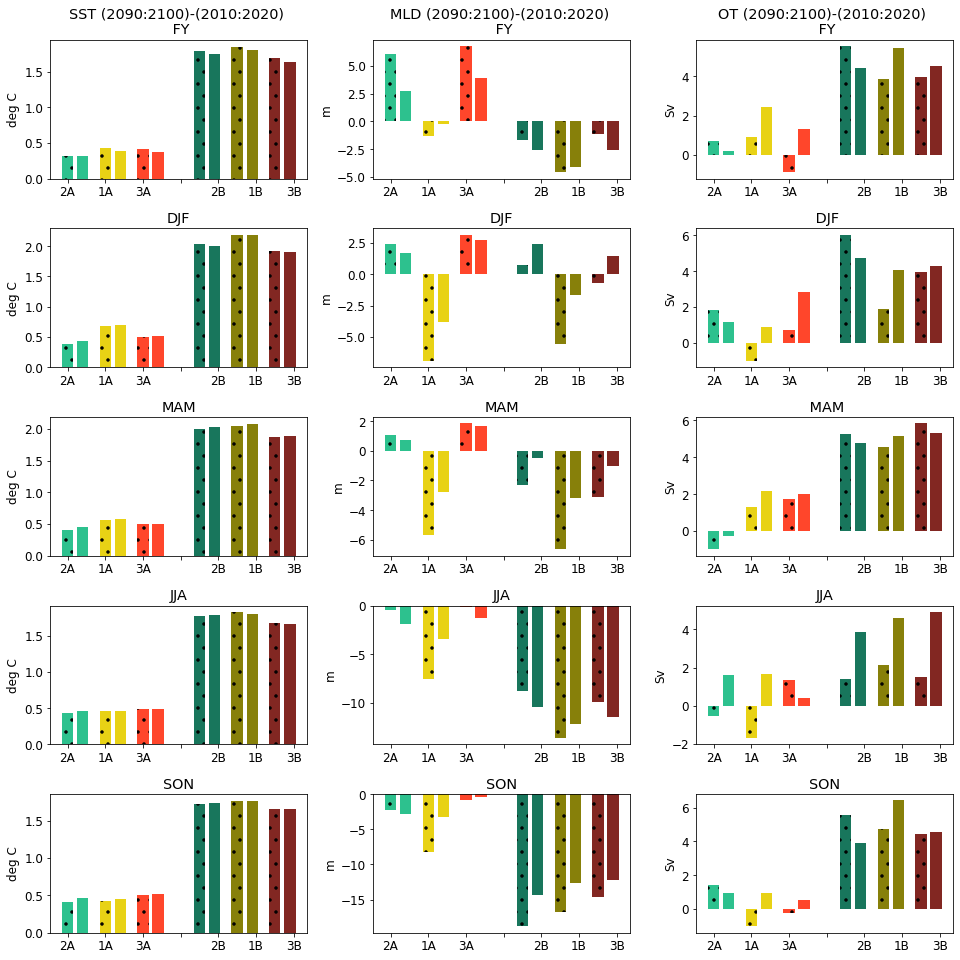

In [50]:
fact = 0.9
fig, axs = plt.subplots(5,3, figsize=(15*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plot_sst(fig)
plot_mld(fig)
plot_ot(fig)


for i in range(0,15):
    axs[i].set_xticks(np.arange(1,8))
    axs[i].set_xticklabels(['2A','1A','3A','','2B','1B','3B'])
#
#
ind = 0
axs[1+ind].set_title('MLD (2090:2100)-(2010:2020) \n FY'); axs[1+ind].set_ylabel('m')
axs[0+ind].set_title('SST (2090:2100)-(2010:2020) \n FY'); axs[0+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2090:2100)-(2010:2020) \n FY'); axs[2+ind].set_ylabel('Sv')
ind = 3
axs[1+ind].set_title('DJF'); axs[1+ind].set_ylabel('m')
axs[0+ind].set_title('DJF'); axs[0+ind].set_ylabel('deg C')
axs[2+ind].set_title(' DJF'); axs[2+ind].set_ylabel('Sv')
ind = 6
axs[1+ind].set_title('MAM'); axs[1+ind].set_ylabel('m')
axs[0+ind].set_title('MAM'); axs[0+ind].set_ylabel('deg C')
axs[2+ind].set_title(' MAM'); axs[2+ind].set_ylabel('Sv')
ind = 9
axs[1+ind].set_title('JJA'); axs[1+ind].set_ylabel('m')
axs[0+ind].set_title('JJA'); axs[0+ind].set_ylabel('deg C')
axs[2+ind].set_title('JJA'); axs[2+ind].set_ylabel('Sv')
ind = 12
axs[1+ind].set_title('SON'); axs[1+ind].set_ylabel('m')
axs[0+ind].set_title('SON'); axs[0+ind].set_ylabel('deg C')
axs[2+ind].set_title('SON'); axs[2+ind].set_ylabel('Sv')

plt.tight_layout()

In [32]:

plt.rc('font', **font)

mod = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


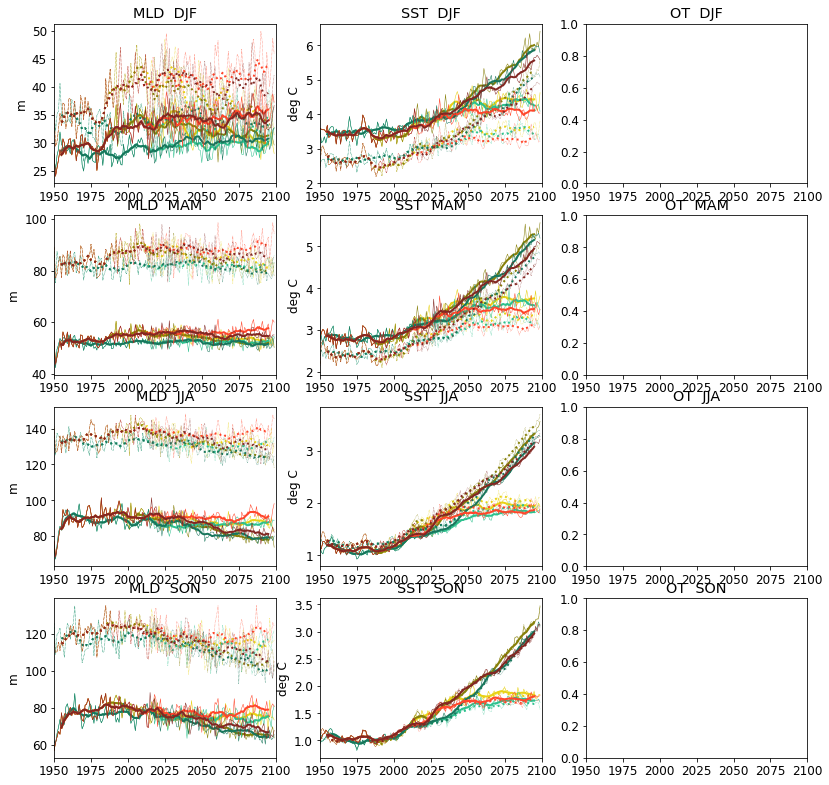

<Figure size 432x288 with 0 Axes>

In [36]:
fact = 0.9
fig, axs = plt.subplots(4,3, figsize=(15*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


plt.figure()

models = ['1A','1B','2A','2B','3A','3B',\
         ]

seas = ['DJF','MAM','JJA','SON']
    
# fact = 1.1
# fig, axs = plt.subplots(4,1, figsize=(12*fact, 18*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

for m in range(0,6):#len(models)):
    
    tmod = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_{models[m]}.nc')
    for i in range(0,4):
            ind = i*3
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 2)
#             axs[0].legend(ncol = 3, fontsize = 10)            
        
    tmod = xr.open_dataset(f'./extracted-summary/somxl010_tom_{models[m]}A6.nc')
    for i in range(0,4):
            ind = i*3
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'], \
                        linestyle = '-', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'], label = mod[models[m]]['name'],\
                        linestyle = '-', linewidth = 2)

    tmod = xr.open_dataset(f'./extracted-summary/SST_ukesm_{models[m]}.nc')
    for i in range(0,4):
            ind = i*3+1
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 2)
#             axs[0].legend(ncol = 3, fontsize = 10)            
        
    tmod = xr.open_dataset(f'./extracted-summary/SST_tom_{models[m]}A6.nc')
    for i in range(0,4):
            ind = i*3+1
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'], \
                        linestyle = '-', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'], label = mod[models[m]]['name'],\
                        linestyle = '-', linewidth = 2)

            
for i in range(0,12):
    
    axs[i].set_xlim([1950,2100])
    
ind = 0
axs[0+ind].set_title('MLD  DJF'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST  DJF'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT  DJF')
ind = 3
axs[0+ind].set_title('MLD  MAM'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST  MAM'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT  MAM')
ind = 6
axs[0+ind].set_title('MLD  JJA'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST  JJA'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT  JJA')
ind = 9
axs[0+ind].set_title('MLD  SON'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST  SON'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT  SON')
            
            
plt.tight_layout()